# ImaginAIrium: Generación de Cuentos Ilustrados con IA

Diego Alejandro Moreno Gallon
Maestria Ing Electrica


Para poder utilizar el notebook debe tener python 3.11 y tener el modulo pipenv instalado. Luego cree una carpeta .venv en la raiz del proyecto y ejecute en terminal el comando pipenv install (Debe ejecutarse en la raiz del proyecto, al nivel del archivo pipfile o pipfile.lock).

### Resumen
"ImaginAIrium" es un proyecto de Inteligencia Artificial (IA) que combina el Procesamiento de Lenguaje Natural (NLP, por sus siglas en inglés) y la generación de imágenes para crear cuentos ilustrados a partir de frases de inicio. Haciendo uso de modelos de IA pre-entrenados, y uno entrenado en local el proyecto es capaz de generar de forma autónoma texto e ilustraciones relevantes y coherentes. El propósito es abrir nuevas posibilidades en la creación de narrativas visuales, facilitando la producción de contenido y democratizando el acceso a la creación de cuentos ilustrados.

### Introducción
La tecnología de la inteligencia artificial continúa expandiendo con grandes avances como lo es chatgpt, bard, traductores ensenaza de indiomas entre otros, encontrando aplicaciones en diversos campos y transformando la manera en que realizamos nuestras actividades cotidianas. Un ámbito en el que se está explorando su potencial es el de la creación de contenidos. "ImaginAIrium", es un proyecto que se inserta en este contexto, combinando las capacidades del Procesamiento de Lenguaje Natural y la generación de imágenes para crear cuentos ilustrados a partir de una frase inicial. Todo para poder poner las abilidadees de codificacion y NLP en un solo proyecto. El corpus se obtiene del proyecto Gutenberg que es una libreria virtual que recopila miles de libros diferentes, ademas es escogido por la facilidad de obtener los datos en un formato que pueda ser manipulable. En total se tomaron 9 libros de los siguientes autores: 

 - Edgar Allan Poe
 - Franz Kafka
 - Julio Verne
 - Fedor Dostoyevsk

### Planteamiento del problema y justificación
El proceso de creación de cuentos ilustrados puede ser exigente y requerir de diversas habilidades, tanto en el ámbito de la escritura creativa como en el diseño gráfico. Estas barreras pueden limitar la participación de individuos en la creación de este tipo de contenido. Además, la generación de nuevas historias y las correspondientes ilustraciones puede ser un proceso que consume mucho tiempo, incluso para profesionales. Al utilizar la inteligencia artificial para automatizar parte de este proceso, "ImaginAIrium" busca abordar estas dificultades, facilitando la creación de cuentos ilustrados y ampliando las posibilidades de quienes pueden participar en este proceso creativo.

### Objetivos
El objetivo principal de "ImaginAIrium" es el de desarrollar un sistema de IA que pueda generar cuentos ilustrados de manera autónoma a partir de una frase de inicio. Los objetivos específicos incluyen:

1. Desarrollar un modelo de NLP que genere texto coherente y creativo a partir de una frase de inicio.
2. Seleccionar e implementar un modelo pre-entredado generador de imágenes que produzca ilustraciones relacionadas con un texto.
3. Integrar ambos modelos en una plataforma que permita crear “cuentos” ilustrados automáticamente.
4. Evaluar la calidad de los cuentos generados en términos de coherencia, creatividad y relevancia visual.


A continuación, analizaré y explicaré de manera general el código realizado. Este código implementa una tarea de procesamiento del lenguaje natural para generación de texto, utilizando una red neuronal recurrente (RNN) y un LLM junto con generacion de imagenes.

## Resumen General Codigo y metodologia

Este script de Python importa varias bibliotecas y clases necesarias para el procesamiento de texto y la generación de texto utilizando modelos de aprendizaje profundo. 

Primero, importa los paquetes necesarios, inicializa una `StableDiffusionPipeline` para generar imágenes y define varias clases útiles (`Tokenizer`, `DataLoader`, `TextAnalyzer` y `TextSplitter`) para cargar, analizar y preparar los datos de texto. 

Luego, inicializa estas clases y realiza algunas operaciones de procesamiento de texto, incluyendo la tokenización del texto en secuencias y la división de los textos en conjuntos de entrenamiento y prueba.

Finalmente, define una clase `CharRNN` que implementa una red neuronal recurrente para la generación de texto, entrena esta red y luego utiliza el modelo entrenado para generar texto y visualizarlo.

## Detalles

Es importante aclarar que para este caso se van a usar generacion por letras y no por palabra, ya que es necesario una base mas grande para poder realizar un buen desempleno.

### Importaciones

El código comienza importando los módulos necesarios, que incluyen `os` y `torch` para manipulación de archivos y operaciones de tensor, respectivamente, y `string` para operaciones con cadenas de texto.

### Inicialización de la Pipeline de Difusión Estable

El módulo `diffusers` proporciona una interfaz para usar la difusión para la generación de texto. En este caso, se carga un modelo preentrenado llamado "stabilityai/stable-diffusion-2-1" y se mueve a la GPU con `pipe.to("cuda")`.

### Clase Tokenizer

La clase `Tokenizer` se utiliza para convertir el texto en secuencias de números y viceversa. Estas secuencias numéricas son las que la red neuronal utilizará para aprender a predecir el siguiente carácter en una secuencia.

### Clase DataLoader

La clase `DataLoader` se utiliza para cargar y preparar los datos de texto. Esta clase puede leer los archivos de texto de un directorio especificado, devolver los textos de un autor específico, leer el contenido de un archivo de texto y devolver todos los textos.

### Clase TextAnalyzer

La clase `TextAnalyzer` se utiliza para obtener todos los caracteres únicos en los textos, que luego se utilizan para construir el vocabulario del `Tokenizer`.

### Preparación de los datos

Después de definir estas clases, el código utiliza `DataLoader` y `TextAnalyzer` para cargar y preparar los datos. Esto incluye obtener todos los caracteres únicos, instanciar el `Tokenizer` y convertir el texto en secuencias numéricas.

### Clase TextSplitter

La clase `TextSplitter` se utiliza para dividir los textos en conjuntos de entrenamiento y prueba.

### Creación de ventanas de texto

La función `windows` se utiliza para crear ventanas deslizantes de texto, que son los ejemplos de entrada que la red utilizará para aprender.

### Clase CharRNDDataset

La clase CharRNDDataset hereda de torch.utils.data.Dataset. Su función principal es convertir datos de texto sin procesar en una forma adecuada para ser utilizados en una red neuronal recurrente (RNN).

### Clase CharRNN

La clase `CharRNN` es una implementación de una red neuronal recurrente. La red utiliza una capa de incrustación (embedding) para convertir los índices de los caracteres en representaciones vectoriales, seguida de varias capas LSTM para aprender las dependencias temporales en los datos de texto, y una capa de salida para predecir el siguiente carácter en la secuencia.

### Entrenamiento de la RNN

Una vez definida la red, el código inicializa la red y la mueve a la GPU con `.to(device)`. Luego, define la función de pérdida (loss function) y el optimizador, y entrena la red durante un número especificado de épocas.

Durante cada época, la red predice el siguiente carácter en cada ventana de texto, calcula la pérdida entre las predicciones y los verdaderos siguientes caracteres, y utiliza la retropropagación para actualizar los pesos de la red.

### Generación de texto

Después de entrenar la red, el código utiliza la función `generate` para generar texto a partir de un carácter inicial. La red predice el siguiente carácter, lo agrega al texto generado, y luego repite este proceso para generar el texto de la longitud deseada.

### Visualización

Finalmente, el código utiliza la `StableDiffusionPipeline` para convertir el texto generado en una imagen y luego visualizarla.

## Resultados

Los resultados se van a ir viendo a medida que se ejecutan las celdas.

In [1]:
import os
import torch
import string
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

c:\Users\diego\OneDrive\Documents\Python Scripts\NLP-Msc-Class\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
text_encoder\model.safetensors not found
Fetching 16 files: 100%|██████████| 16/16 [00:00<?, ?it/s]


In [2]:
class Tokenizer(): 
    
  def __init__(self, all_characters):
    self.all_characters = all_characters
    self.n_characters = len(self.all_characters)
    
  def text_to_seq(self, string):
    seq = []
    for c in range(len(string)):
        try:
            seq.append(self.all_characters.index(string[c]))
        except:
            continue
    return seq

  def seq_to_text(self, seq):
    text = ''
    for c in range(len(seq)):
        text += self.all_characters[seq[c]]
    return text

class DataLoader:
    def __init__(self, data_dir="Data"):
        self.data_dir = data_dir
        self.authors = self._get_authors()
        self.paths = self._get_all_paths()

    def _get_authors(self):
        return [name for name in os.listdir(self.data_dir) if os.path.isdir(os.path.join(self.data_dir, name))]

    def _get_all_paths(self):
        paths = []
        for author in self.authors:
            author_dir = os.path.join(self.data_dir, author)
            paths.extend([os.path.join(author_dir, filename) for filename in os.listdir(author_dir) if filename.endswith('.txt')])
        return paths

    def get_texts_paths(self, author):
        if author not in self.authors:
            raise ValueError(f"Author {author} does not exist in data directory.")
        author_dir = os.path.join(self.data_dir, author)
        return [os.path.join(author_dir, filename) for filename in os.listdir(author_dir) if filename.endswith('.txt')]

    def read_text(self, path):
        with open(path, 'r', encoding='utf-8') as file:
            return file.read().replace('\ufeff', '')

    def iter_all_texts(self):
        for author in self.authors:
            paths = self.get_texts_paths(author)
            for path in paths:
                yield self.read_text(path)

    def get_all_texts(self):
        texts = []
        for author in self.authors:
            paths = self.get_texts_paths(author)
            for path in paths:
                text = self.read_text(path)
                texts.append(text)
        return texts

    def get_text_by_index(self, index):
        return self.read_text(self.paths[index])

class TextAnalyzer:
    def __init__(self, text_generator):
        self.text_generator = text_generator

    def get_unique_chars(self):
        unique_chars = set()
        for text in self.text_generator:
            unique_chars.update(set(text))
        return unique_chars

In [3]:
loader = DataLoader()

analyzer = TextAnalyzer(loader.iter_all_texts())
unique_chars = analyzer.get_unique_chars()
unique_chars.update(set(string.printable))
unique_chars = sorted(list(unique_chars))

all_chars = ''.join(unique_chars)
all_chars

'\t\n\x0b\x0c\r !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~£°ÆÉàâäæçèéêîïôöüŒœΠΤάέίαεηικλμνξοπρςστφωόἰὁὴ—‘’“”'

In [4]:
tokenizer = Tokenizer(all_chars)
tokenizer.n_characters

150

In [5]:
loader = DataLoader()
text = loader.get_text_by_index(0)
print(text[0:50])

A friend of mine, who is a man of letters and a ph


In [6]:
tokenizer.text_to_seq('A friend of mine,')

[38, 5, 75, 87, 78, 74, 83, 73, 5, 84, 75, 5, 82, 78, 83, 74, 17]

In [7]:
for seq in loader.get_all_texts():
    print(tokenizer.text_to_seq(seq))
    break

[38, 5, 75, 87, 78, 74, 83, 73, 5, 84, 75, 5, 82, 78, 83, 74, 17, 5, 92, 77, 84, 5, 78, 88, 5, 70, 5, 82, 70, 83, 5, 84, 75, 5, 81, 74, 89, 89, 74, 87, 88, 5, 70, 83, 73, 5, 70, 5, 85, 77, 78, 81, 84, 88, 84, 85, 77, 74, 87, 17, 5, 88, 70, 78, 73, 5, 89, 84, 5, 82, 74, 1, 84, 83, 74, 5, 73, 70, 94, 17, 5, 70, 88, 5, 78, 75, 5, 71, 74, 89, 92, 74, 74, 83, 5, 79, 74, 88, 89, 5, 70, 83, 73, 5, 74, 70, 87, 83, 74, 88, 89, 17, 5, 148, 43, 70, 83, 72, 94, 6, 5, 88, 78, 83, 72, 74, 5, 92, 74, 5, 81, 70, 88, 89, 5, 82, 74, 89, 5, 46, 1, 77, 70, 91, 74, 5, 73, 78, 88, 72, 84, 91, 74, 87, 74, 73, 5, 70, 5, 77, 70, 90, 83, 89, 74, 73, 5, 77, 84, 90, 88, 74, 5, 78, 83, 5, 89, 77, 74, 5, 82, 78, 73, 88, 89, 5, 84, 75, 5, 49, 84, 83, 73, 84, 83, 19, 149, 1, 1, 148, 55, 74, 70, 81, 81, 94, 5, 77, 70, 90, 83, 89, 74, 73, 36, 5, 70, 83, 73, 5, 71, 94, 5, 92, 77, 70, 89, 17, 18, 18, 76, 77, 84, 88, 89, 88, 36, 149, 1, 1, 148, 60, 74, 81, 81, 17, 5, 46, 5, 72, 70, 83, 147, 89, 5, 70, 83, 88, 92, 74, 87, 

In [8]:
from sklearn.model_selection import train_test_split

class TextSplitter:
    def __init__(self, text, tokenizer):
        self.text = text
        self.tokenizer = tokenizer
        self.train_texts = []
        self.test_texts = []

    def split_texts(self, train_size=0.8, random_state=42):
        train_size = int(len(self.text) * train_size)
        train_texts = self.text[:train_size]
        test_texts = self.text[train_size:]

        for text in train_texts:
            self.train_texts += self.tokenizer.text_to_seq(text)

        for text in test_texts:
            self.test_texts += self.tokenizer.text_to_seq(text)
            
    def get_train_texts(self):
        return self.train_texts

    def get_test_texts(self):
        return self.test_texts

train_texts = []
test_texts = []
full_texts = []
for text in loader.iter_all_texts():
    splitter = TextSplitter(text, tokenizer)
    splitter.split_texts()
    train_texts = splitter.train_texts + train_texts
    test_texts = splitter.test_texts + test_texts
    full_texts = splitter.train_texts + splitter.test_texts + full_texts


In [9]:
import random
window_size = 200
def windows(text, window_size = 100):
    start_index = 0
    end_index = len(text) - window_size
    text_windows = []
    while start_index < end_index:
      text_windows.append(text[start_index:start_index+window_size+1])
      start_index += 1
    return text_windows

text_encoded_windows = windows(full_texts, window_size)

In [10]:
print(tokenizer.seq_to_text((text_encoded_windows[0])))
print()
print(tokenizer.seq_to_text((text_encoded_windows[1])))
print()
print(tokenizer.seq_to_text((text_encoded_windows[2])))
print()
print(tokenizer.seq_to_text((text_encoded_windows[3])))

A few years ago the world was suddenly astounded by hearing of an
experiment of a most novel and daring nature, altogether unprecedented
in the annals of science. The BALTIMORE GUN CLUB, a society of
a

 few years ago the world was suddenly astounded by hearing of an
experiment of a most novel and daring nature, altogether unprecedented
in the annals of science. The BALTIMORE GUN CLUB, a society of
ar

few years ago the world was suddenly astounded by hearing of an
experiment of a most novel and daring nature, altogether unprecedented
in the annals of science. The BALTIMORE GUN CLUB, a society of
art

ew years ago the world was suddenly astounded by hearing of an
experiment of a most novel and daring nature, altogether unprecedented
in the annals of science. The BALTIMORE GUN CLUB, a society of
arti


In [11]:
class CharRNNDataset(torch.utils.data.Dataset):
  def __init__(self, text_encoded_windows, train=True):
    self.text = text_encoded_windows
    self.train = train

  def __len__(self):
    return len(self.text)

  def __getitem__(self, ix):
    if self.train:
      return torch.tensor(self.text[ix][:-1]), torch.tensor(self.text[ix][-1])
    return torch.tensor(self.text[ix])

In [12]:
train_text_encoded_windows = windows(train_texts)
test_text_encoded_windows = windows(test_texts)

dataset = {
    'train': CharRNNDataset(train_text_encoded_windows),
    'val': CharRNNDataset(test_text_encoded_windows)
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=512, shuffle=True, pin_memory=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=2048, shuffle=False, pin_memory=True),
}

len(dataset['train']), len(dataset['val'])

(3195939, 798915)

In [13]:
input, output = dataset['train'][0]
tokenizer.seq_to_text(input)

'A few years ago the world was suddenly astounded by hearing of an\nexperiment of a most novel and dar'

In [14]:
tokenizer.seq_to_text([output])

'i'

In [15]:
class CharRNN(torch.nn.Module):
  def __init__(self, input_size, embedding_size=128, hidden_size=256, num_layers=2, dropout=0.2):
    super().__init__()
    self.encoder = torch.nn.Embedding(input_size, embedding_size)
    self.rnn = torch.nn.LSTM(input_size=embedding_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout, batch_first=True)
    self.fc = torch.nn.Linear(hidden_size, input_size)

  def forward(self, x):
    x = self.encoder(x)
    x, h = self.rnn(x)         
    y = self.fc(x[:,-1,:])
    return y

In [16]:
model = CharRNN(input_size=tokenizer.n_characters)
outputs = model(torch.randint(0, tokenizer.n_characters, (64, 50)))
outputs.shape

torch.Size([64, 150])

In [17]:
from tqdm import tqdm
import numpy as np


device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

def fit(model, dataloader, epochs=10):
    losses = []
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss = []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            bar.set_description(f"loss {np.mean(train_loss):.5f}")
        bar = tqdm(dataloader['val'])
        val_loss = []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                bar.set_description(f"val_loss {np.mean(val_loss):.5f}")
        losses.append(np.mean(val_loss))
        if len(losses) > 1 and abs(np.mean(val_loss) - losses[-1]) < 1e-5:
            break
        torch.save(model.state_dict(), "model.pth")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f}")

def predict(model, X):
    model.eval() 
    with torch.no_grad():
        X = torch.tensor(X).to(device)
        pred = model(X.unsqueeze(0))
        return pred

cuda


In [18]:
model = CharRNN(input_size=tokenizer.n_characters)
fit(model, dataloader, epochs=30)

val_loss 1.48039: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s]


Epoch 1/30 loss 1.73485 val_loss 1.48039


val_loss 1.38749: 100%|██████████| 391/391 [01:08<00:00,  5.72it/s]


In [19]:
# model = CharRNN(input_size=tokenizer.n_characters)  # inicializa el modelo
# model.load_state_dict(torch.load("model.pth"))
# model.eval()

In [25]:
X_new = "In a dark night"
X_new_encoded = tokenizer.text_to_seq(X_new)
y_pred = predict(model, X_new_encoded)
y_pred = torch.argmax(y_pred, axis=1)[0].item()
tokenizer.seq_to_text([y_pred])

' '

In [21]:
temp=0.6
for i in range(200):
  X_new_encoded = tokenizer.text_to_seq(X_new[-window_size:])
  y_pred = predict(model, X_new_encoded)
  y_pred = y_pred.view(-1).div(temp).exp()
  top_i = torch.multinomial(y_pred, 1)[0]
  predicted_char = tokenizer.all_characters[top_i]
  X_new += predicted_char

print(X_new)

In a dark night called it at her own feeling to discusity to go works she would be still to the most show and surprised before his friends was hand and discussion of though what we are fluention of both of the studi


In [22]:
print("Imagine " + X_new)
image = pipe(X_new).images
image

ImagineIn a dark night called it at her own feeling to discusity to go works she would be still to the most show and surprised before his friends was hand and discussion of though what we are fluention of both of the studi


100%|██████████| 50/50 [09:10<00:00, 11.02s/it]


[<PIL.Image.Image image mode=RGB size=768x768>]

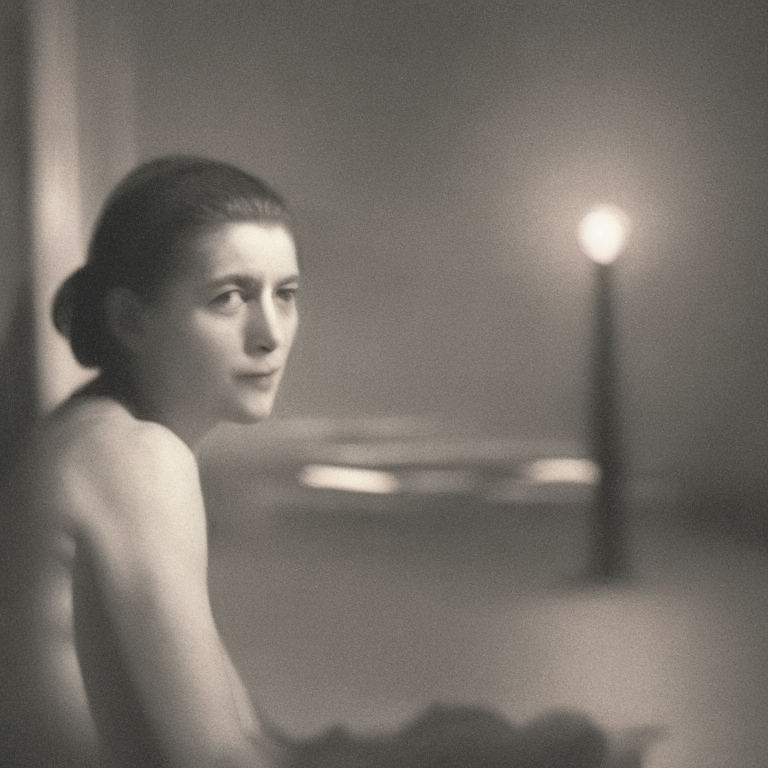

In [29]:
image[0]

In [32]:
image[0].save(X_new.replace(' ', '_') + ".png")

In [26]:
import openai

class Openai_conection:
    def __init__(self, 
                 key_path, 
                 code_path=None, 
                 text=None, 
                 save_path='./defecto.py', 
                 max_tokens=20,
                 action="\nPara el código anterior, reescribelo, agregándole comentarios de qué hace el código"):
        self.api_key = self._read_key(key_path)
        self.code = text if text is not None else self._read_code(code_path)
        self.max_tokens = max_tokens
        self.save_path = save_path
        self.engine = "text-davinci-003"
        self.action = action
        openai.api_key = self.api_key

    def _read_key(self, path):
        with open(path, 'r') as file:
            api_key = file.readline()
        return api_key

    def _read_code(self, path):
        if path is None:
            raise ValueError("Must specify either 'text' or 'code_path'.")
        with open(path, 'r') as file:
            code = file.read()
        return code

    def generate_comment(self):
        response = openai.Completion.create(
            engine=self.engine,
            prompt= self.code + self.action,
            temperature=0.5,
            max_tokens=self.max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
        )
        self.response_text = response["choices"][0]["text"]
    
    def generate_answer(self, text):
        response = openai.Completion.create(
            engine=self.engine,
            prompt= text + self.action,
            temperature=0.5,
            max_tokens=self.max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
        )
        self.response_text = response["choices"][0]["text"]
    
    def save_commented_code(self):
        with open(self.save_path, 'w') as file:
            file.write(self.response_text)

# def main():
#     # Para usar un archivo de código
#     commenter = AutoCommenter(key_path='./key.txt', code_path='./prueba.py', max_tokens=1000, save_path='./prueba_comentada.py')

In [28]:
action = """
As you are a great writer with deep knowledge of authors like franz kafka, julio verne, dostoyevski or edgar allan poe 
among many others. Use the above text as a basis to invent a short story of one paragraph.
"""
generator = Openai_conection(key_path='./key.txt', text="In a dark night", max_tokens=300, action=action)
generator.generate_answer(text="In a dark night")
print("Imagine " + generator.response_text)

In a dark night, the world appeared suspended, a silhouette of spectral stillness drawn against the ebony sky. Alone, a solitary figure emerged, shrouded in the cloak of solitude, reminiscent of Kafka's Gregor Samsa in his alienation, yet brimming with the tenacious curiosity of Verne's Phileas Fogg. The eeriness of the darkness, as chilling as Dostoyevsky's Siberian prison camps, clung to the air, yet the figure pressed onward, driven by an insatiable desire to penetrate the enigma of the night. Suddenly, a distant glow flickered, shattering the monotonous gloom, casting a scene worthy of an Edgar Allan Poe tale. The figure's heart pounded like the incessant beat beneath the floorboards in 'The Tell-Tale Heart'. But instead of fear, the glow invoked in our lone wanderer a sense of wonder and revelation, a light slicing through the existential torment and bathing the world in the soft luminescence of understanding. The night, in its silent wisdom, had unveiled its secret - that within 

In [35]:

response = "In a dark night, the world appeared suspended, a silhouette of spectral stillness drawn against the ebony sky. Alone, a solitary figure emerged, shrouded in the cloak of solitude, reminiscent of Kafka's Gregor Samsa in his alienation, yet brimming with the tenacious curiosity of Verne's Phileas Fogg. The eeriness of the darkness, as chilling as Dostoyevsky's Siberian prison camps, clung to the air, yet the figure pressed onward, driven by an insatiable desire to penetrate the enigma of the night. Suddenly, a distant glow flickered, shattering the monotonous gloom, casting a scene worthy of an Edgar Allan Poe tale. The figure's heart pounded like the incessant beat beneath the floorboards in 'The Tell-Tale Heart'. But instead of fear, the glow invoked in our lone wanderer a sense of wonder and revelation, a light slicing through the existential torment and bathing the world in the soft luminescence of understanding. The night, in its silent wisdom, had unveiled its secret - that within its darkness, there always lay the promise of dawn."
image = pipe('Imagine ' + response).images
image

Token indices sequence length is longer than the specified maximum sequence length for this model (238 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", as chilling as dostoyevsky's siberian prison camps, clung to the air, yet the figure pressed onward, driven by an insatiable desire to penetrate the enigma of the night. suddenly, a distant glow flickered, shattering the monotonous gloom, casting a scene worthy of an edgar allan poe tale. the figure's heart pounded like the incessant beat beneath the floorboards in 't he tell - tale heart '. but instead of fear, the glow invoked in our lone wanderer a sense of wonder and revelation, a light slicing through the existential torment and bathing the world in the soft luminescence of understanding. the night, in its silent wisdom, had unveiled its secret - that within its darkness, there always lay the promi

100%|██████████| 50/50 [09:13<00:00, 11.07s/it]


[<PIL.Image.Image image mode=RGB size=768x768>]

In [38]:
image[0].save(f"In_a_dark_night2.png")

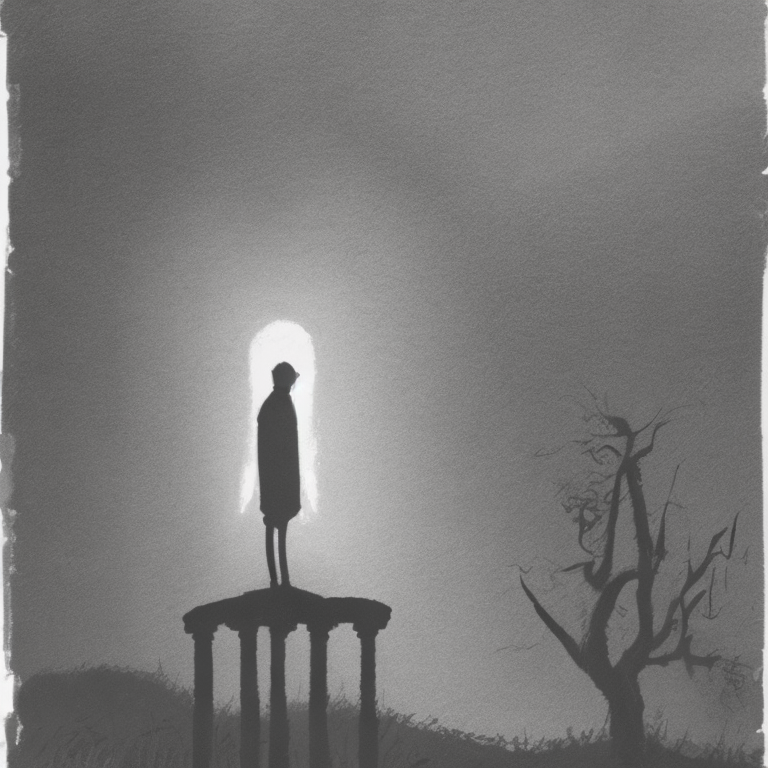

In [37]:
image[0]

In [47]:
from transformers import pipeline
generator = pipeline('text-generation', model='gpt2-large')
text = "In a dark night"
result = generator(text, max_length=300, num_return_sequences=2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [48]:
result

[{'generated_text': 'In a dark night of the soul."\n\nI was reading this last June as a kid in fourth grade when I stumbled upon the original of The Haunting of Hill House, and when it came to the passage describing the scene from which the original of the book originated, an old man who said that he was a "prolific writer" was quoted. It was a quote with which I had always assumed. It would have been in my top ten quotes. And as I was getting the book to my class, my teacher pulled a copy of the first line back and said that the famous author had once described the man\'s story as "\'a story of a father and son haunting their haunted Hill House.\'\n\n"So I checked the quotes to see if there was also a full quote or part of an actual quote. I found this old book and went through it, but all I saw was a few incomplete lines, some with double-entendres. And none of them were full."\n\nAnd even today, I don\'t have the original of Hill House. It was the first time I saw it in print and I 

In [53]:
images = []
i = 0
for element in result:
    print(element['generated_text'])
    image = pipe('Imagine ' + element['generated_text']).images
    image[0].save("Image" + str(i) + ".png")
    images.append(image)
    i += 1

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['i had always assumed. it would have been in my top ten quotes. and as i was getting the book to my class, my teacher pulled a copy of the first line back and said that the famous author had once described the man\'s story as "\' a story of a father and son haunting their haunted hill house.\' " so i checked the quotes to see if there was also a full quote or part of an actual quote. i found this old book and went through it, but all i saw was a few incomplete lines, some with double - entendres. and none of them were full." and even today, i don \'t have the original of hill house. it was the first time i saw it in print and i am certain that i would have liked to have had it in my collection. the book is so engrossing that i can \'t give it full marks, because the full quotes do not appear to have been part of the original text. it is with this understanding of a few quotes that i 

In a dark night of the soul."

I was reading this last June as a kid in fourth grade when I stumbled upon the original of The Haunting of Hill House, and when it came to the passage describing the scene from which the original of the book originated, an old man who said that he was a "prolific writer" was quoted. It was a quote with which I had always assumed. It would have been in my top ten quotes. And as I was getting the book to my class, my teacher pulled a copy of the first line back and said that the famous author had once described the man's story as "'a story of a father and son haunting their haunted Hill House.'

"So I checked the quotes to see if there was also a full quote or part of an actual quote. I found this old book and went through it, but all I saw was a few incomplete lines, some with double-entendres. And none of them were full."

And even today, I don't have the original of Hill House. It was the first time I saw it in print and I am certain that I would have li

100%|██████████| 50/50 [09:13<00:00, 11.08s/it]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['stand above the power of man. now these great heroes have chosen to face this fate. to reclaim their lands from the hands of the wicked and to give the gift the life it so desperately needed. features :']


In a dark night that has struck the land, a group of mysterious figures have begun a terrifying ritual in order to bring about the end of everything. The men, women, and children of the land have been betrayed and their lands have been left in utter despair. The only ones who can stand against the ancient order of mankind were the Chosen People, who were sworn to stand above the power of man. Now these great heroes have chosen to face this fate. To reclaim their lands from the hands of the wicked and to give the gift the life it so desperately needed.

Features:


100%|██████████| 50/50 [09:37<00:00, 11.55s/it]


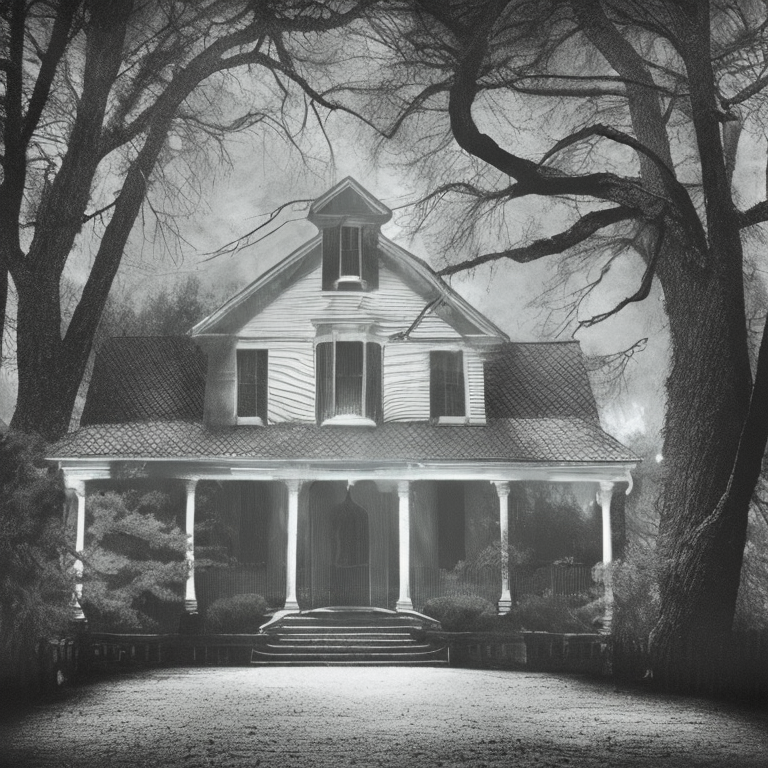

In [55]:
images[0][0]

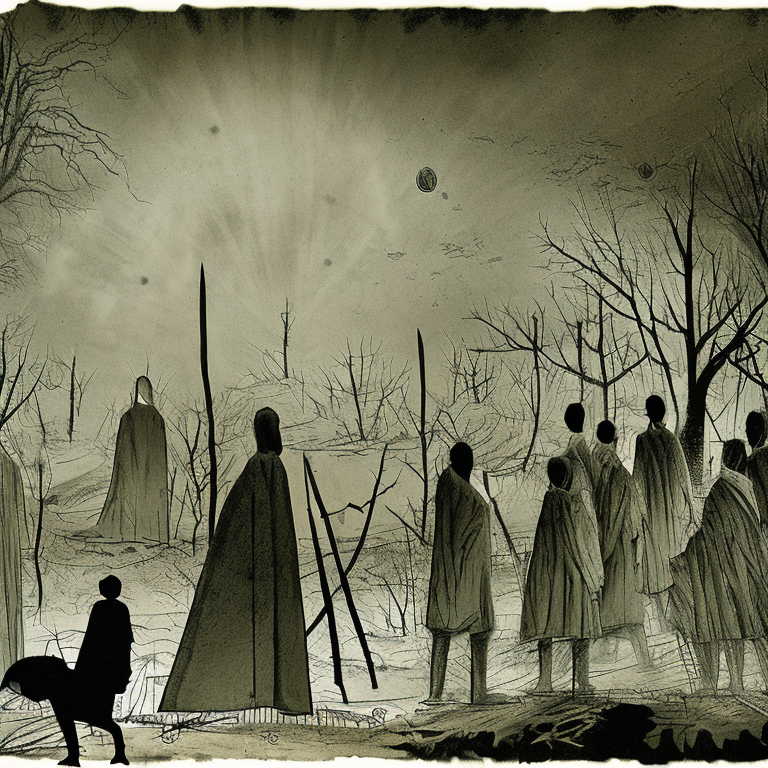

In [56]:
images[1][0]

## Análisis de los resultados del generador de texto:

Modelo 1:
El primer modelo produce un texto que carece de coherencia y de una trama clara. Es difícil discernir la historia o el mensaje a partir de la frase generada. Parece haber cierta falta de coherencia en las oraciones, lo que sugiere que este modelo puede no haber sido entrenado adecuadamente o puede no tener una gran capacidad para generar texto narrativo coherente.

Modelo 2:
Este modelo ha generado un texto altamente descriptivo y evocador que capta la atención del lector. Se tejen referencias literarias a lo largo del texto, lo que añade profundidad a la narrativa. La frase inicial "In a dark night" se amplía en un cuento que combina la descripción con la narración de una manera que mantiene al lector enganchado. Este modelo parece muy eficaz en la generación de texto narrativo de calidad.

Modelo 3.1:
Este modelo genera un texto que parece ser parte de una narración personal más larga. Hay una trama perceptible, aunque el cambio en el tono y el contenido en medio de la generación hace que la coherencia de la historia sea un poco confusa. Sin embargo, parece que este modelo es capaz de generar texto que mantiene una cierta narrativa y fluidez.

Modelo 3.2:
Este modelo genera un texto que se asemeja a una narración épica o a una sinopsis de una historia de fantasía. La frase inicial ha sido expandida en una descripción detallada de un evento apocalíptico y la lucha de los héroes contra este. Este modelo parece ser efectivo para generar textos de alta fantasía.

En general, estos resultados demuestran la variabilidad en la calidad y el tipo de texto que los diferentes modelos pueden generar. Al seleccionar un modelo para usar en aplicaciones prácticas, es importante tener en cuenta qué tipo de texto se desea generar y seleccionar un modelo que se haya demostrado que puede producir dicho texto de manera efectiva.

## Conclusion

El resultado del modelo creado a pedal es bajo, comparado con los otros utilizados, y las imagenes creadas logran hasta cierto punto incluir algunas caracteristicas inclidas en el texto.

## Comentarios extra

Es de anadir que solo tiene dos epocas de entrenamiento y aun asi logra crear palabras conocidas y practicamente ninguna inventada, si se le pudiera dar mas tiempo de entrenamiento podria generar una mejor solucion. El mayor problema es que es muy pesado el entrenamiento y si solo tiene 150 caracteres ahora con todo un diccionario seria practicamente imposible con las herramientas que se disponen en el momento.Por otro lado los modelos pre-entrenados tienen un desempeno bastante alto y logran textos bastante bien logrados, el consumo de recursos es relativamente poco y las imagenes logran representar en cierta medida